In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("../ready_data/merged_marwis.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [24]:

# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by timestamp to ensure proper order (if not already sorted)
df = df.sort_values('timestamp')

# Calculate the time difference between each row
df['time_diff'] = df['timestamp'].diff()

# Check for rows where the time difference is greater than the expected interval
# For example, more than 1 second if data is supposed to be at 1-second intervals
gap_threshold = pd.Timedelta(minutes=5)
gaps = df[df['time_diff'] > gap_threshold]
print_gaps = gaps[['timestamp', 'time_diff']]
# Display gaps with their time differences
print("Gaps in Time Series Data:")
print_gaps

Gaps in Time Series Data:


,timestamp,time_diff
50452,2023-12-02 08:09:45+02:00,0 days 11:56:24
111417,2023-12-04 05:32:03+02:00,1 days 04:17:53
169001,2023-12-04 21:35:38+02:00,0 days 01:41:45
169883,2023-12-05 05:37:46+02:00,0 days 07:47:19
226741,2023-12-06 08:07:45+02:00,0 days 12:13:53
...,...,...
2240445,2024-02-27 05:37:21+02:00,0 days 11:00:02
2287196,2024-02-28 05:15:15+02:00,0 days 10:35:14
2334939,2024-02-28 23:38:27+02:00,0 days 05:02:55
2336160,2024-02-29 12:43:57+02:00,0 days 12:46:00


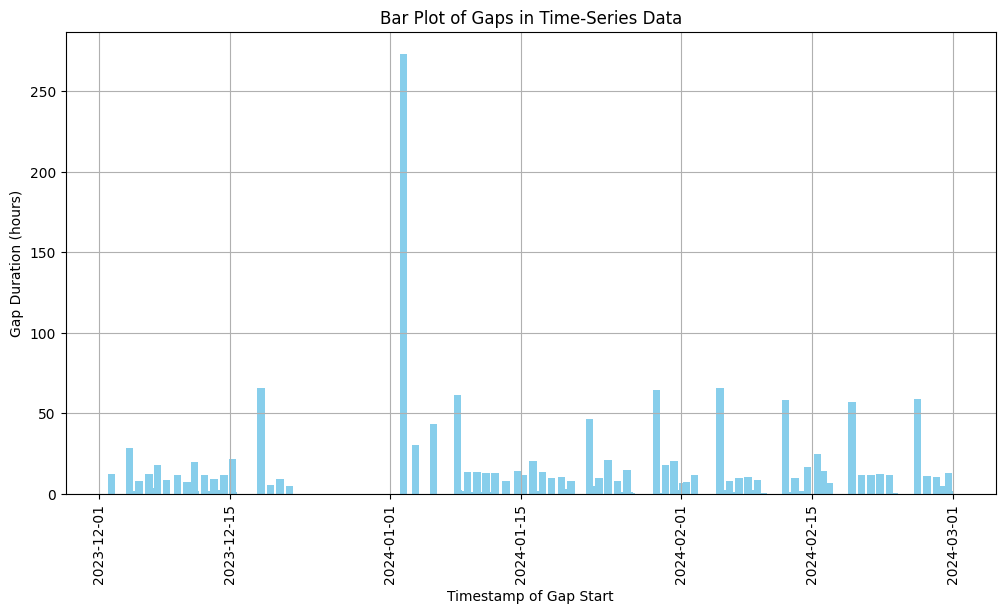

In [25]:
# Create a bar plot for the gaps
plt.figure(figsize=(12, 6))
plt.bar(gaps['timestamp'], gaps['time_diff'].dt.total_seconds()/3600, color='skyblue')

# Label the axes and title
plt.xlabel('Timestamp of Gap Start')
plt.ylabel('Gap Duration (hours)')
plt.title('Bar Plot of Gaps in Time-Series Data')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Big gap during the christmas time, as well as few day gaps during the weekends.
Resampling dataset to get 5 minutes timestep instead of 1 second.

In [26]:
df["timestamp"] = pd.to_datetime(df.timestamp)

In [27]:
# Resample to 5-minute intervals, applying a specific aggregation function, e.g., mean
df_resampled = df.set_index("timestamp").resample('5T').mean()  # or .sum(), .first(), etc.


/var/folders/19/0ldx1bc54jx5tvjkrsbcv4040000gn/T/ipykernel_20305/4089398212.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.set_index("timestamp").resample('5T').mean()  # or .sum(), .first(), etc.


In [28]:
df_resampled = df_resampled.dropna()

In [29]:
time_range = pd.date_range(start="2023-12-01T04:00:00.000Z", end="2024-02-29T13:15:00.000Z", freq="5min")
missing_dates = time_range[~time_range.isin(df_resampled.index)]
print(missing_dates)

DatetimeIndex(['2023-12-01 18:15:00+00:00', '2023-12-01 18:20:00+00:00',
               '2023-12-01 18:25:00+00:00', '2023-12-01 18:30:00+00:00',
               '2023-12-01 18:35:00+00:00', '2023-12-01 18:40:00+00:00',
               '2023-12-01 18:45:00+00:00', '2023-12-01 18:50:00+00:00',
               '2023-12-01 18:55:00+00:00', '2023-12-01 19:00:00+00:00',
               ...
               '2024-02-29 12:25:00+00:00', '2024-02-29 12:30:00+00:00',
               '2024-02-29 12:35:00+00:00', '2024-02-29 12:40:00+00:00',
               '2024-02-29 12:45:00+00:00', '2024-02-29 12:50:00+00:00',
               '2024-02-29 12:55:00+00:00', '2024-02-29 13:00:00+00:00',
               '2024-02-29 13:05:00+00:00', '2024-02-29 13:10:00+00:00'],
              dtype='datetime64[ns, UTC]', length=18410, freq=None)


With 5 minute timestamp, for 3 month, there should be more then 20k rows, but instead we have only 7k. Which means that most of the data is missing.
First, try to parse needed data from starwis weather station